# Análisis de Data

### Hipótesis 1: Existe estacionalidad en el mes de Junio y Noviembre 
### Hipótesis 2: El producto tiene una tendencia de crecimiento a partir del 2019
### Hipótesis 3: El comportamiento de la variable de Inversión e Historicos son similares
### Hipótesis 4: Existe una correlación entre Inversión e Historicos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import minimize
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
data = pd.read_csv("Base.csv", encoding = "latin-1", index_col = 0) 
data.head(10) 

,Historico,Inversion
Fecha,,
01/01/2018,5006,1721.35
02/01/2018,3979,1793.28
03/01/2018,4138,2312.67
04/01/2018,6647,2783.06
05/01/2018,6609,2744.71
06/01/2018,7327,2693.81
07/01/2018,4964,2470.53
08/01/2018,6649,6490.23
09/01/2018,5936,285.99


In [4]:
data.shape

(30, 2)

In [9]:
data.columns.values

array(['Historico', 'Inversion'], dtype=object)

In [6]:
data.index.dtype

dtype('O')

In [8]:
data.index = pd.to_datetime(data.index)
data.index.dtype

dtype('<M8[ns]')

In [10]:
data.dtypes

Historico      int64
Inversion    float64
dtype: object

Text(0, 0.5, 'Frecuencia')

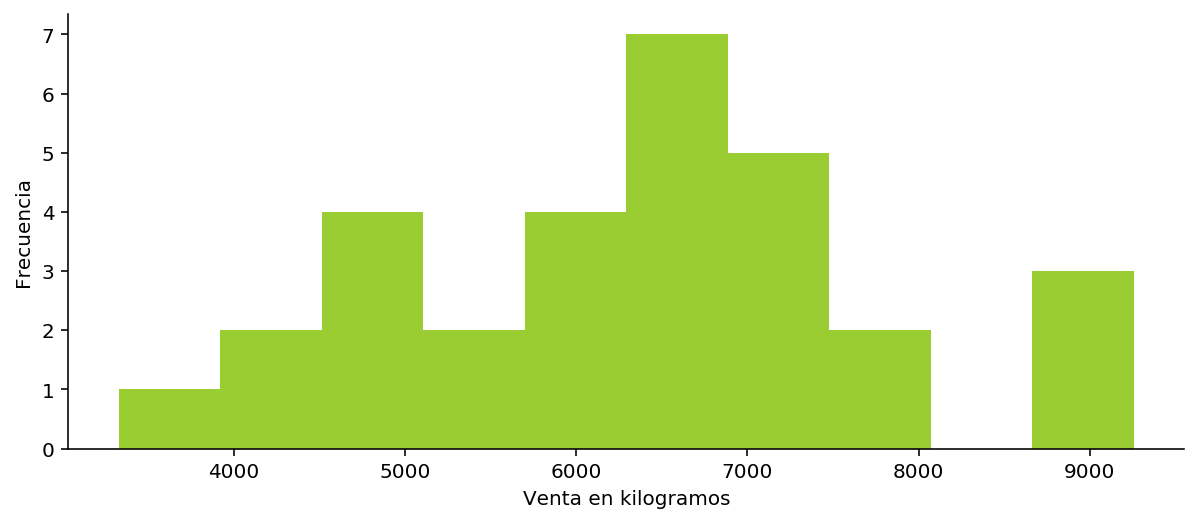

In [48]:
plt.hist(hst, color="yellowgreen")
plt.xlabel("Venta en kilogramos")
plt.ylabel("Frecuencia")

In [26]:
data.describe()

,Historico,Inversion
count,30.000000,30.000000
mean,6332.666667,2412.512000
std,1406.012541,1082.570132
min,3329.000000,285.990000
25%,5197.750000,1816.847500
50%,6544.000000,2452.870000
75%,7090.750000,2735.830000
max,9255.000000,6490.230000


In [46]:
data["Historico"].idxmin()

Timestamp('2019-04-01 00:00:00')

In [47]:
data["Historico"].idxmax()

Timestamp('2019-11-01 00:00:00')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9340fcfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d934100fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9340fc688>],
 'medians': [<matplotlib.lines.Line2D at 0x1d934106a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d93410ca88>],
 'means': []}

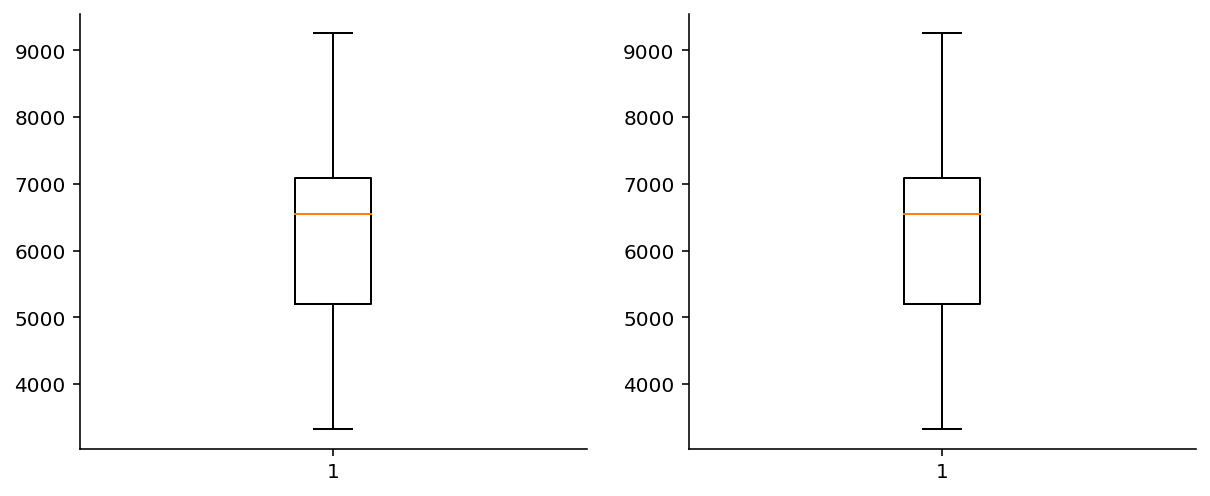

In [34]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(hst)
ax[1].boxplot(inv)

## Comportamiento: Tendencia & Estacionalidad

In [11]:
hst = data["Historico"].resample("M").sum()
inv = data["Historico"].resample("M").sum()

In [54]:
hst.std()

1406.012540615416

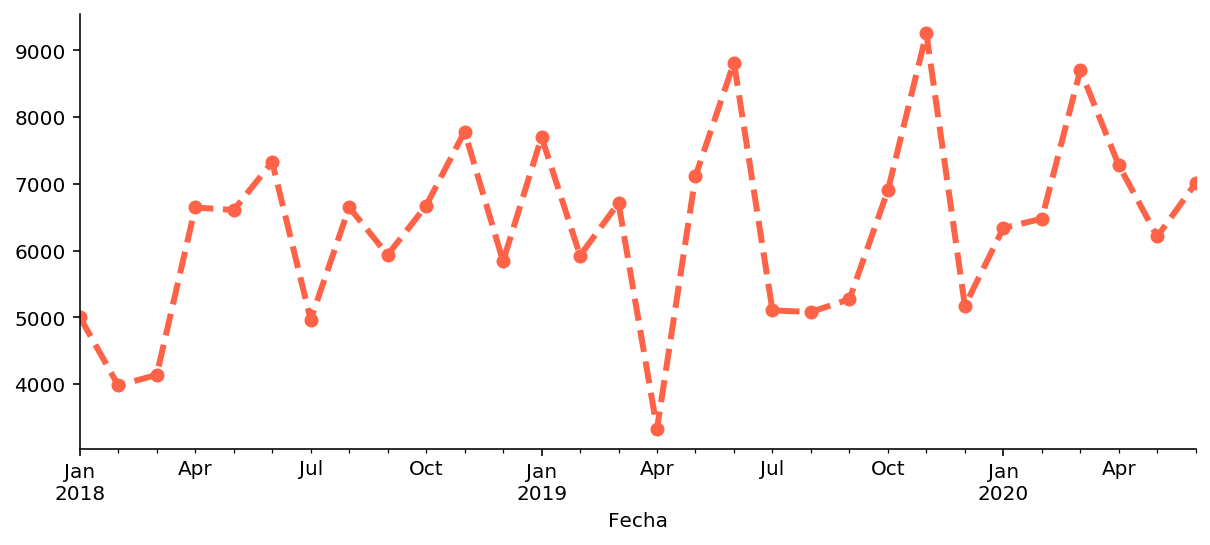

In [39]:
hst.plot(marker="o",color="tomato", linewidth=3, linestyle="--")

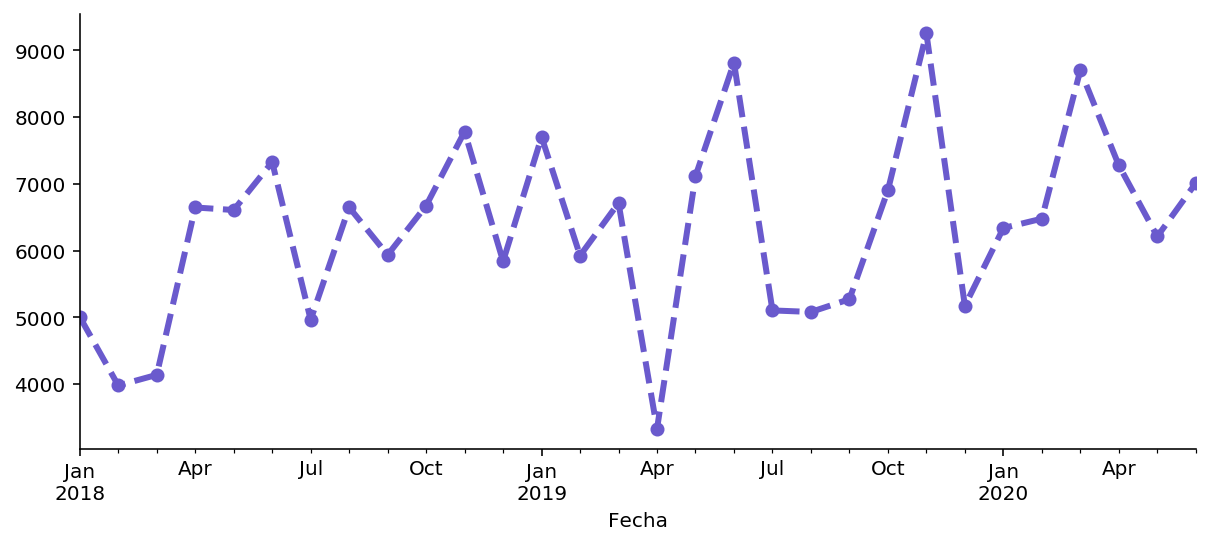

In [40]:
inv.plot(marker="o",color="slateblue", linewidth=3, linestyle="--")

## Autocorrelación de Historicos

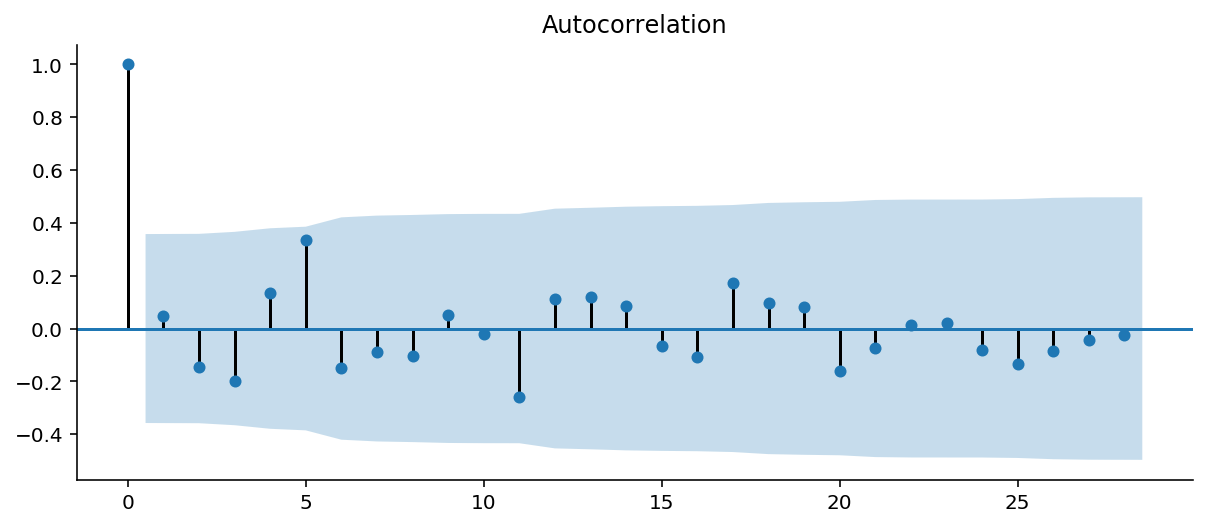

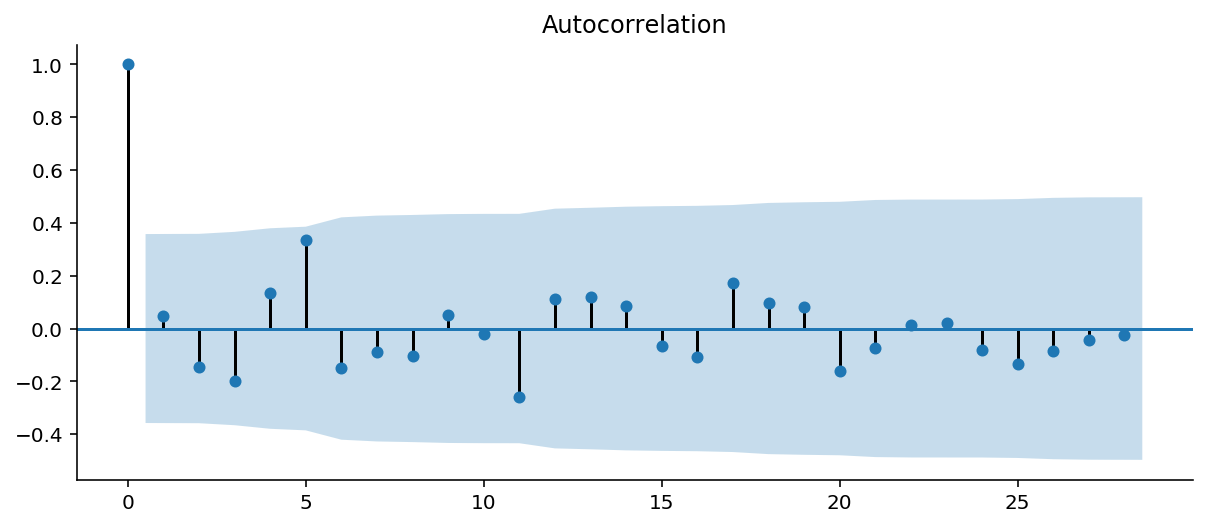

In [53]:
plot_acf(hst, lags=28)

## Correlación

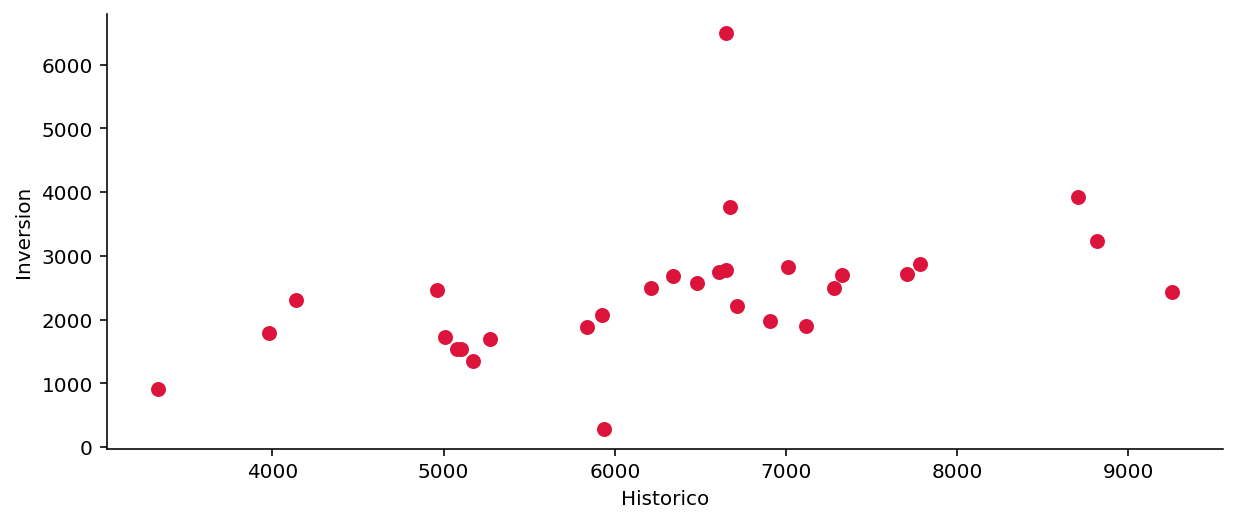

In [52]:
data.plot(kind="scatter",x="Historico",y="Inversion", color="crimson", linewidth=3)